In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('flight_delays_train.csv')
test = pd.read_csv('flight_delays_test.csv')

train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


## Data Wrangling

In [4]:
print("Our training set has {} rows and {} columns".format(train.shape[0], train.shape[1]))

Our training set has 100000 rows and 9 columns


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         100000 non-null  object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


In [6]:
train.isnull().sum().sort_values(ascending=False)

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
UniqueCarrier        0
Origin               0
Dest                 0
Distance             0
dep_delayed_15min    0
dtype: int64

In [7]:
train.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1341.523880,729.39716
std,476.378445,574.61686
min,1.000000,30.00000
25%,931.000000,317.00000
50%,1330.000000,575.00000
75%,1733.000000,957.00000
max,2534.000000,4962.00000


## Visualization

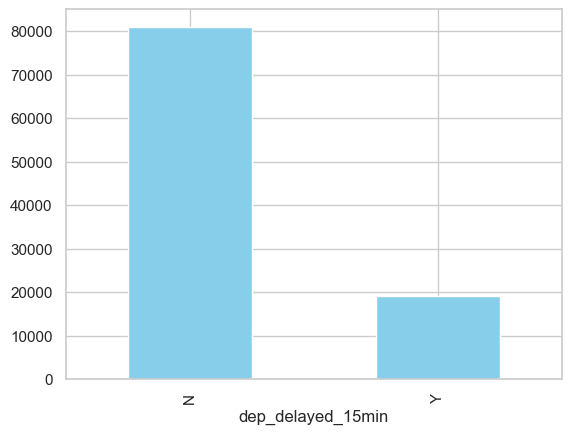

In [8]:
sns.set(style="whitegrid")
train['dep_delayed_15min'].value_counts().plot(kind='bar', color='skyblue')
plt.show();

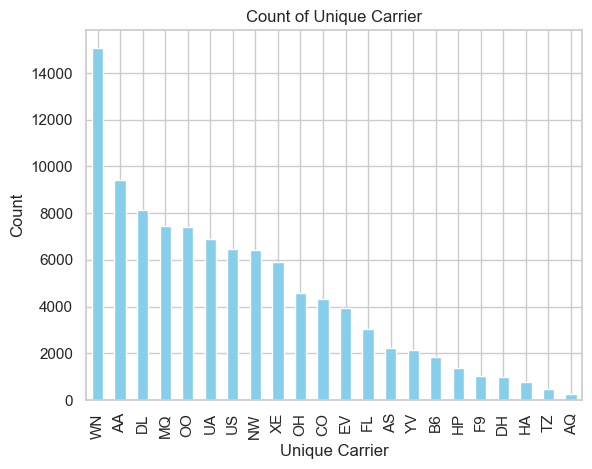

In [9]:
train['UniqueCarrier'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Unique Carrier')
plt.ylabel('Count')
plt.title('Count of Unique Carrier')
plt.show();

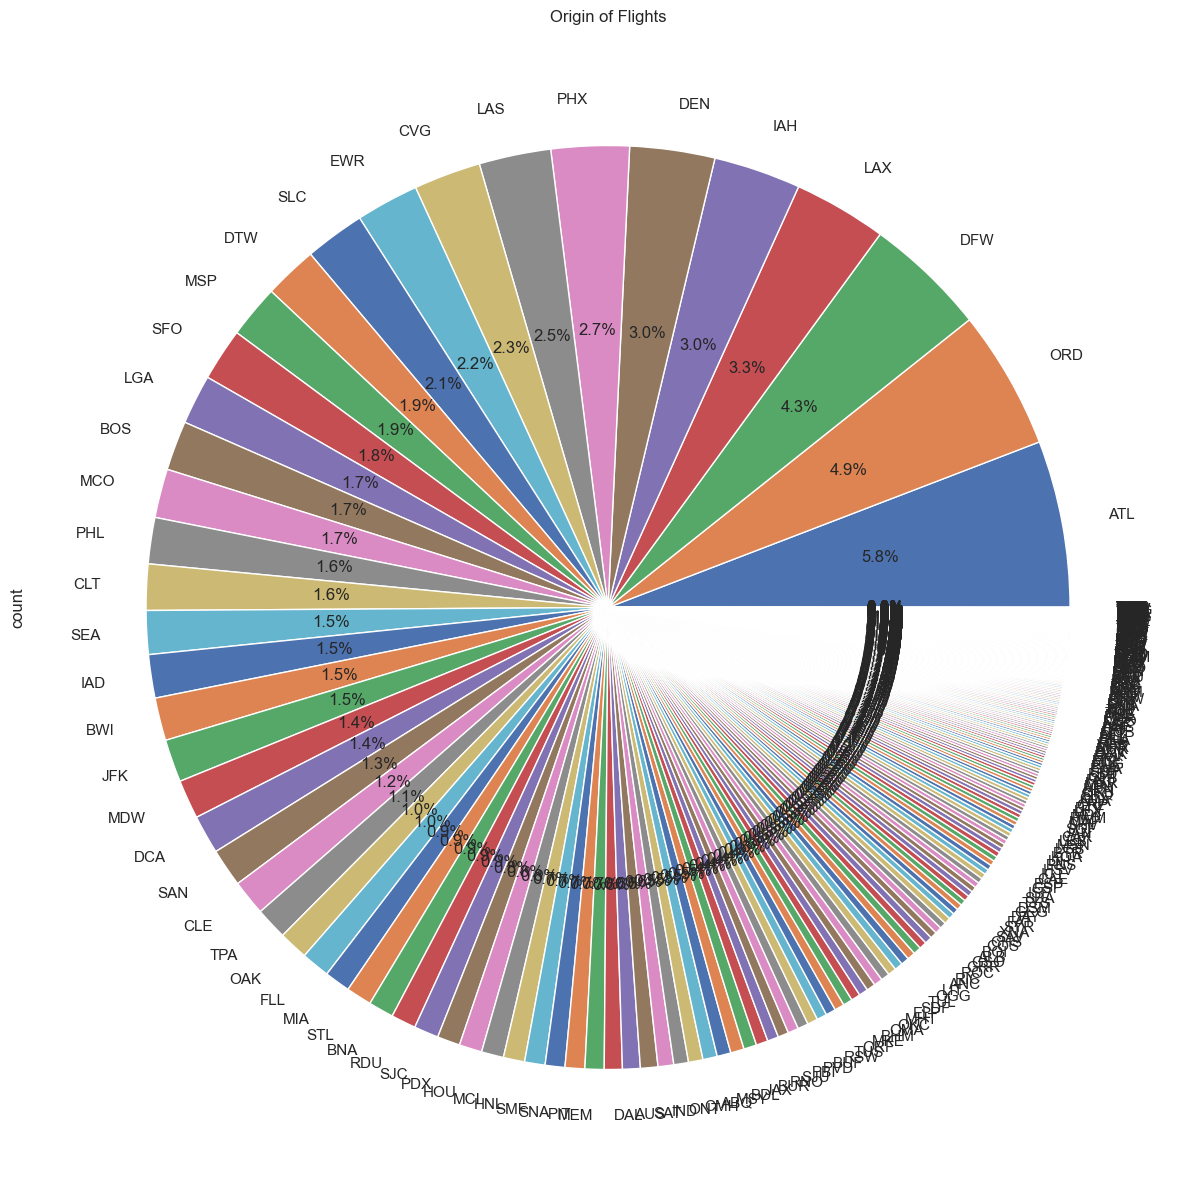

In [10]:
# We plot a pie chart of places of origin based on the number of flights
train['Origin'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(15, 15))
plt.title('Origin of Flights')
plt.show();

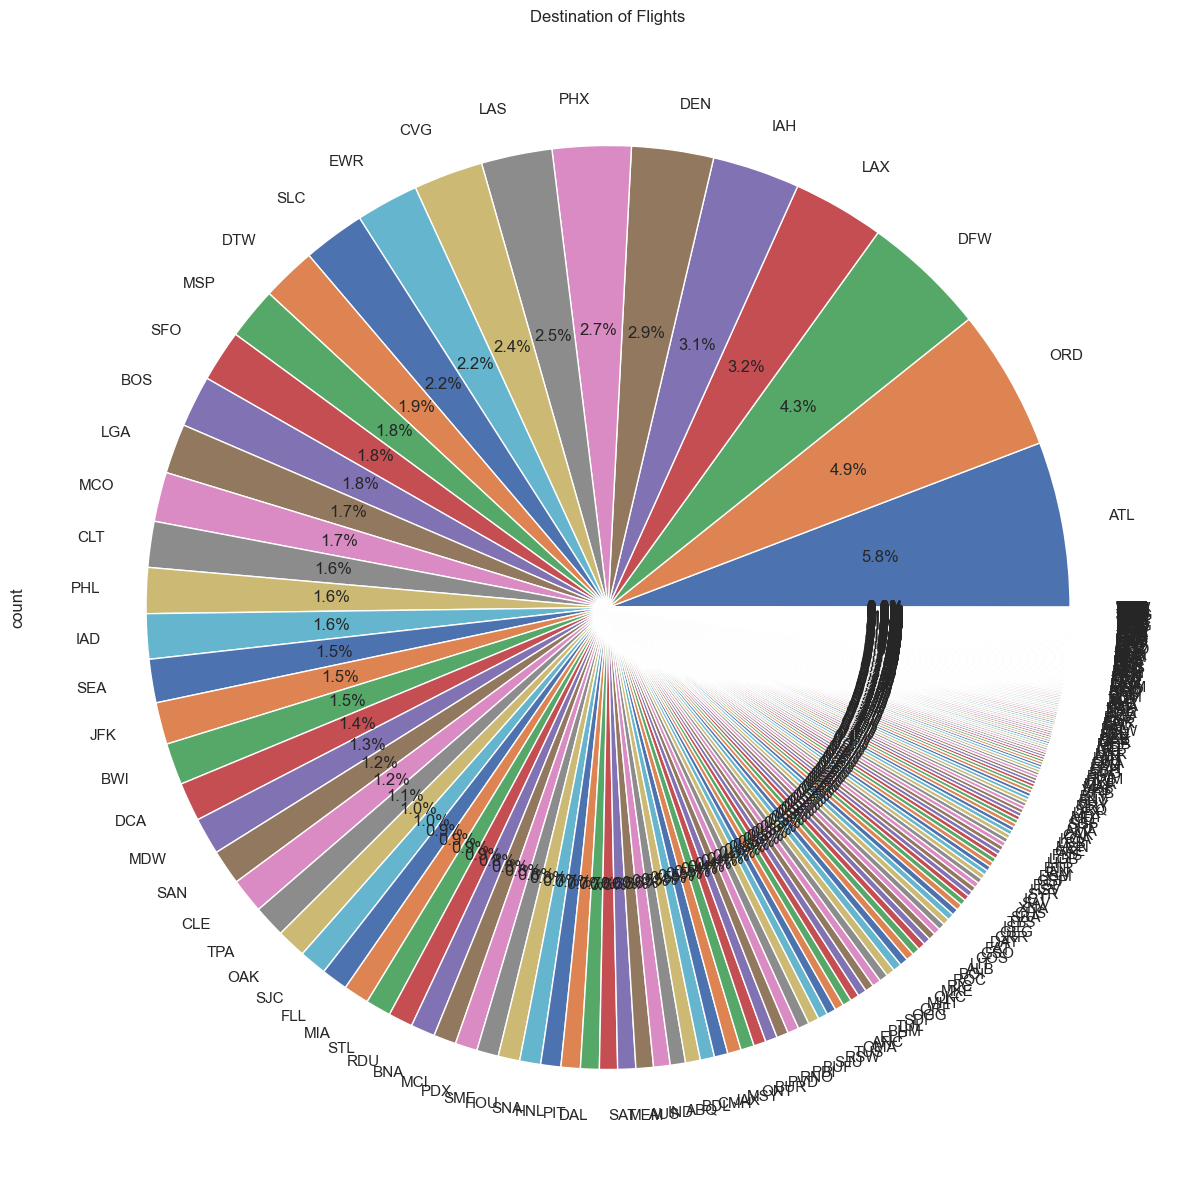

In [11]:
# We plot a pie chart of places of destination based on the number of flights
train['Dest'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(15, 15))
plt.title('Destination of Flights')
plt.show();

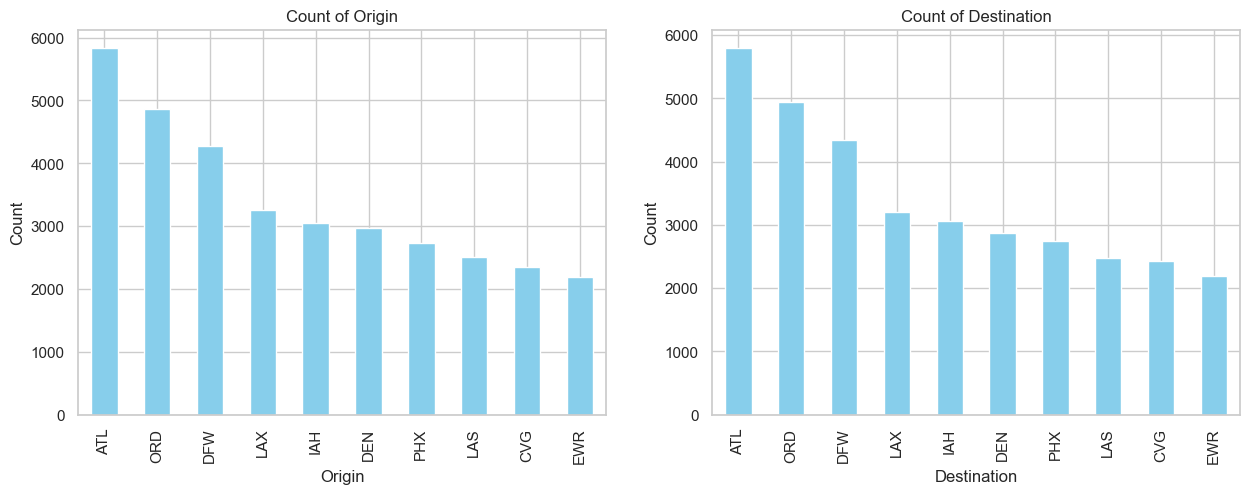

In [12]:
# We will do a comparison of top 10 origin and destination airports
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
train['Origin'].value_counts().head(10).plot(kind='bar', color='skyblue', ax=ax[0])
ax[0].set_xlabel('Origin')
ax[0].set_ylabel('Count')
ax[0].set_title('Count of Origin')
train['Dest'].value_counts().head(10).plot(kind='bar', color='skyblue', ax=ax[1])
ax[1].set_xlabel('Destination')
ax[1].set_ylabel('Count')
ax[1].set_title('Count of Destination')
plt.show();

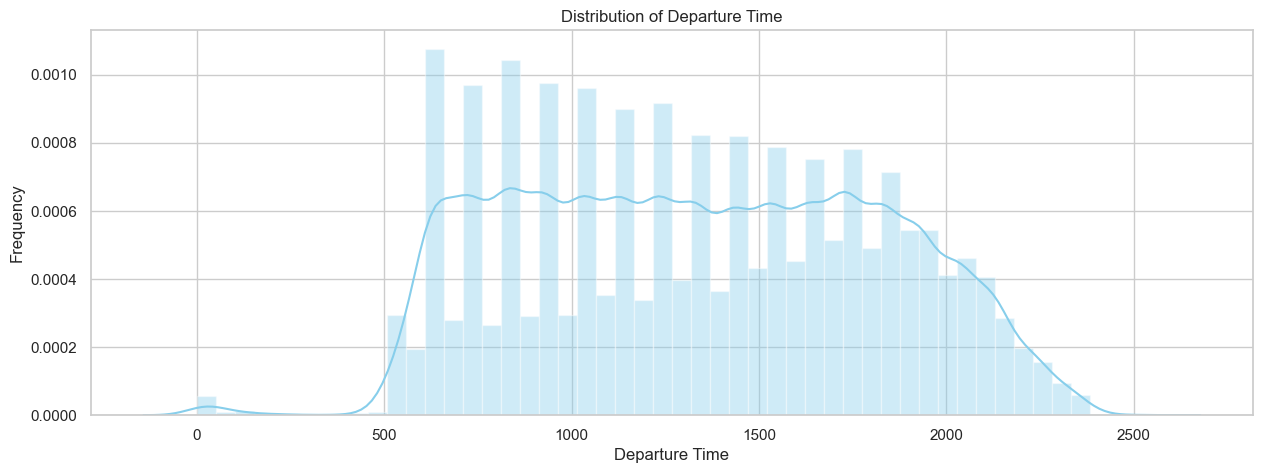

In [13]:
# We will plot the distribution of departure delays
plt.figure(figsize=(15, 5))
sns.distplot(train['DepTime'], color='skyblue')
plt.xlabel('Departure Time')
plt.ylabel('Frequency')
plt.title('Distribution of Departure Time')
plt.show();

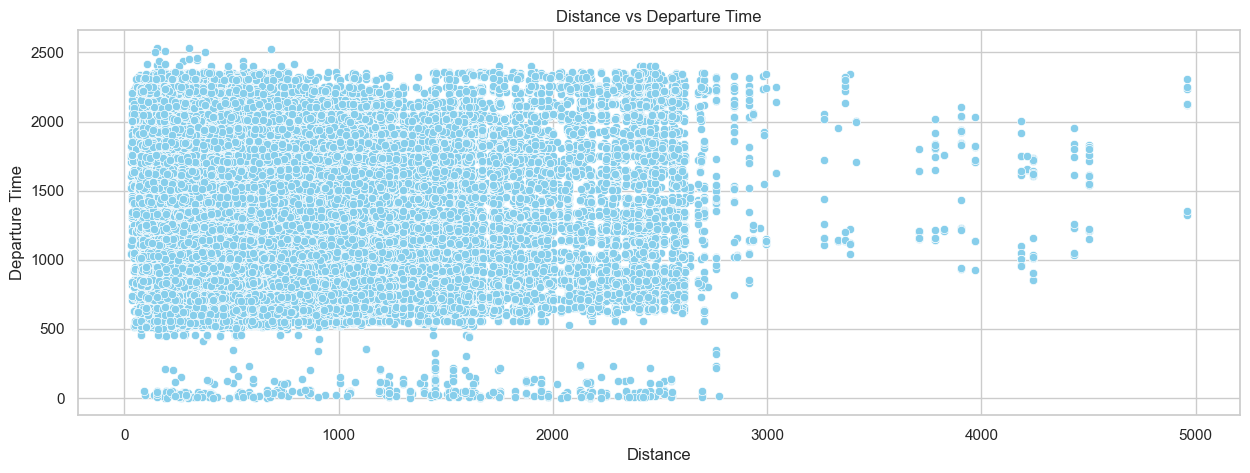

In [14]:
# We will plot the distance in relation to the departure delay
plt.figure(figsize=(15, 5))
sns.scatterplot(x='Distance', y='DepTime', data=train, color='skyblue')
plt.xlabel('Distance')
plt.ylabel('Departure Time')
plt.title('Distance vs Departure Time')
plt.show();

## Feature Engineering

In [15]:
train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [16]:
# We will convert the 'DepTime' column to a string
train['DepTime'] = train['DepTime'].astype(str)

# We will convert the 'DepTime' column to a datetime object
train['DepTime'] = pd.to_datetime(train['DepTime'], format='%H%M', errors='coerce')

# We will extract the hour from the 'DepTime' column
train['hour'] = train['DepTime'].dt.hour

# We will extract the minute from the 'DepTime' column
train['minute'] = train['DepTime'].dt.minute

train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,hour,minute
0,c-8,c-21,c-7,1900-01-01 19:34:00,AA,ATL,DFW,732,N,19.0,34.0
1,c-4,c-20,c-3,1900-01-01 15:48:00,US,PIT,MCO,834,N,15.0,48.0
2,c-9,c-2,c-5,1900-01-01 14:22:00,XE,RDU,CLE,416,N,14.0,22.0
3,c-11,c-25,c-6,1900-01-01 10:15:00,OO,DEN,MEM,872,N,10.0,15.0
4,c-10,c-7,c-6,1900-01-01 18:28:00,WN,MDW,OMA,423,Y,18.0,28.0


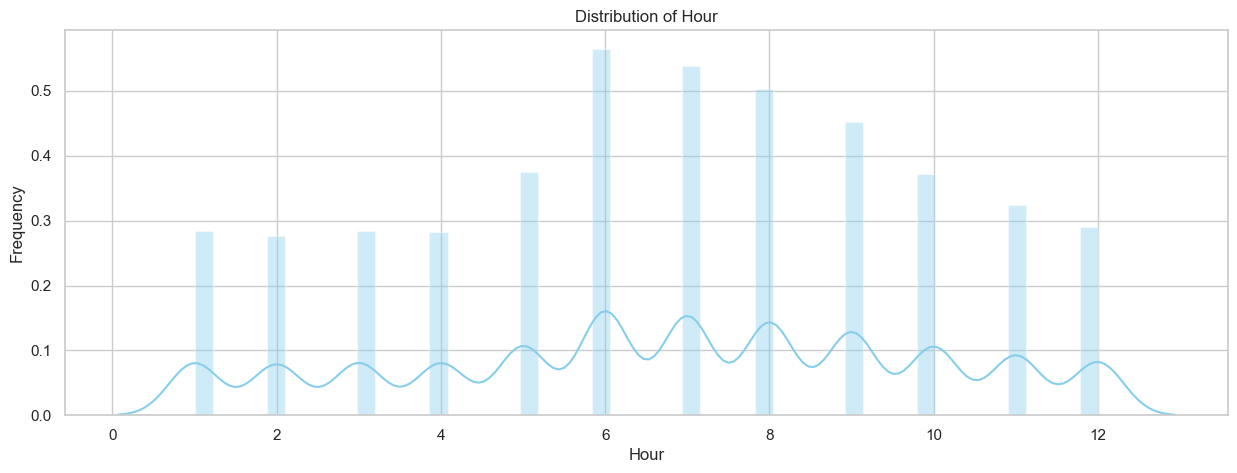

In [17]:
# We can also feature engineer the 'hour' column
train['hour'] = np.where(train['hour'] > 12, train['hour'] - 12, train['hour']) # We will convert the hour to 12-hour format

# We will plot the distribution of the 'hour' column
plt.figure(figsize=(15, 5))
sns.distplot(train['hour'], color='skyblue')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Distribution of Hour')
plt.show();

In [18]:
train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,hour,minute
0,c-8,c-21,c-7,1900-01-01 19:34:00,AA,ATL,DFW,732,N,7.0,34.0
1,c-4,c-20,c-3,1900-01-01 15:48:00,US,PIT,MCO,834,N,3.0,48.0
2,c-9,c-2,c-5,1900-01-01 14:22:00,XE,RDU,CLE,416,N,2.0,22.0
3,c-11,c-25,c-6,1900-01-01 10:15:00,OO,DEN,MEM,872,N,10.0,15.0
4,c-10,c-7,c-6,1900-01-01 18:28:00,WN,MDW,OMA,423,Y,6.0,28.0


In [19]:
# The values of months and day of the week are denoted by c- so we will remove the c- from the values
train['Month'] = train['Month'].str.replace('c-', '')
train['DayofMonth'] = train['DayofMonth'].str.replace('c-', '')
train['DayOfWeek'] = train['DayOfWeek'].str.replace('c-', '')

# We will convert the 'Month', 'DayofMonth' and 'DayOfWeek' columns to integers
train['Month'] = train['Month'].astype(int)
train['DayofMonth'] = train['DayofMonth'].astype(int)
train['DayOfWeek'] = train['DayOfWeek'].astype(int)

In [20]:
# The DepTime column has a 1900-01-01 date starting for all the values so we will remove it
train['DepTime'] = train['DepTime'].dt.time

train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,hour,minute
0,8,21,7,19:34:00,AA,ATL,DFW,732,N,7.0,34.0
1,4,20,3,15:48:00,US,PIT,MCO,834,N,3.0,48.0
2,9,2,5,14:22:00,XE,RDU,CLE,416,N,2.0,22.0
3,11,25,6,10:15:00,OO,DEN,MEM,872,N,10.0,15.0
4,10,7,6,18:28:00,WN,MDW,OMA,423,Y,6.0,28.0


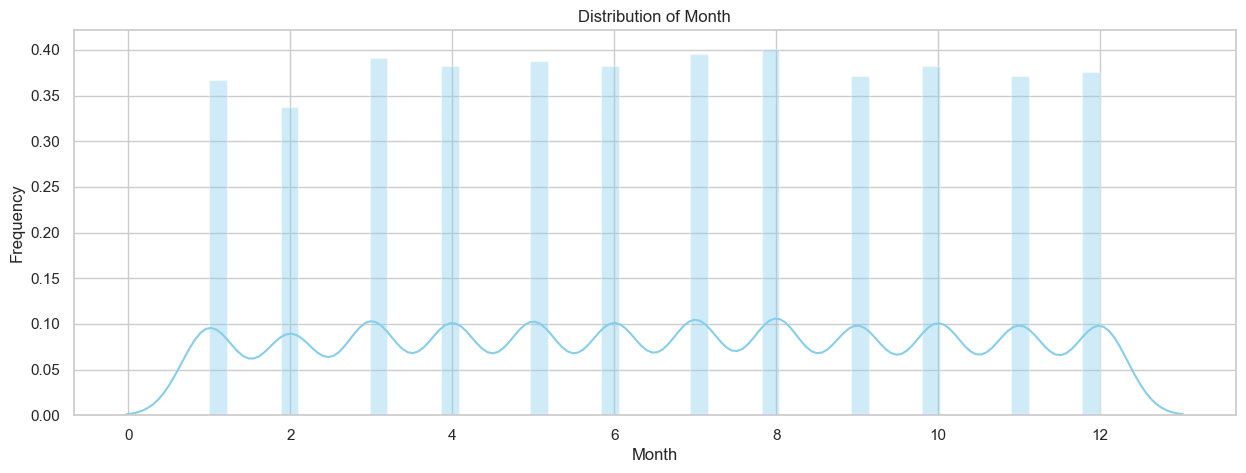

In [21]:
# We will plot the distribution of the 'Month' column
plt.figure(figsize=(15, 5))
sns.distplot(train['Month'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Distribution of Month')
plt.show();

In [22]:
# Check the unique values in the 'UniqueCarrier' column
for col in train.columns:
    print(col, train[col].nunique())

Month 12
DayofMonth 31
DayOfWeek 7
DepTime 1204
UniqueCarrier 22
Origin 289
Dest 289
Distance 1310
dep_delayed_15min 2
hour 12
minute 60


## Model Building

In [23]:
from sklearn.preprocessing import LabelEncoder

# We will encode the 'UniqueCarrier' column
le = LabelEncoder()
train['UniqueCarrier'] = le.fit_transform(train['UniqueCarrier'])

train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,hour,minute
0,8,21,7,19:34:00,0,ATL,DFW,732,N,7.0,34.0
1,4,20,3,15:48:00,18,PIT,MCO,834,N,3.0,48.0
2,9,2,5,14:22:00,20,RDU,CLE,416,N,2.0,22.0
3,11,25,6,10:15:00,15,DEN,MEM,872,N,10.0,15.0
4,10,7,6,18:28:00,19,MDW,OMA,423,Y,6.0,28.0


In [24]:
# We will encode the 'Origin' and 'Dest' columns
train = pd.get_dummies(train, columns=['Origin', 'Dest'])

train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Distance,dep_delayed_15min,hour,minute,Origin_ABE,...,Dest_TYS,Dest_VCT,Dest_VIS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YUM
0,8,21,7,19:34:00,0,732,N,7.0,34.0,False,...,False,False,False,False,False,False,False,False,False,False
1,4,20,3,15:48:00,18,834,N,3.0,48.0,False,...,False,False,False,False,False,False,False,False,False,False
2,9,2,5,14:22:00,20,416,N,2.0,22.0,False,...,False,False,False,False,False,False,False,False,False,False
3,11,25,6,10:15:00,15,872,N,10.0,15.0,False,...,False,False,False,False,False,False,False,False,False,False
4,10,7,6,18:28:00,19,423,Y,6.0,28.0,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
# We will encode the 'DepTime' column
train['DepTime'] = train['DepTime'].astype(str)
train = pd.get_dummies(train, columns=['DepTime'])

train.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,Distance,dep_delayed_15min,hour,minute,Origin_ABE,Origin_ABI,...,DepTime_23:51:00,DepTime_23:52:00,DepTime_23:53:00,DepTime_23:54:00,DepTime_23:55:00,DepTime_23:56:00,DepTime_23:57:00,DepTime_23:58:00,DepTime_23:59:00,DepTime_NaT
0,8,21,7,0,732,N,7.0,34.0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4,20,3,18,834,N,3.0,48.0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,9,2,5,20,416,N,2.0,22.0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,11,25,6,15,872,N,10.0,15.0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,10,7,6,19,423,Y,6.0,28.0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
from sklearn.model_selection import train_test_split

train['dep_delayed_15min'] = train['dep_delayed_15min'].map({'N': 0, 'Y': 1})

# We will split the data into features and target variable
X = train.drop('dep_delayed_15min', axis=1)
y = train['dep_delayed_15min']

# We will split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# We will train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# We will make predictions
y_pred = rf.predict(X_test)

# We will evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Accuracy: 0.81215
Classification Report:               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16222
           1       0.63      0.01      0.03      3778

    accuracy                           0.81     20000
   macro avg       0.72      0.51      0.46     20000
weighted avg       0.78      0.81      0.73     20000

Confusion Matrix: [[16192    30]
 [ 3727    51]]


The ROC AUC score is:  0.5058249327635699


Text(0, 0.5, 'True Positive Rate')

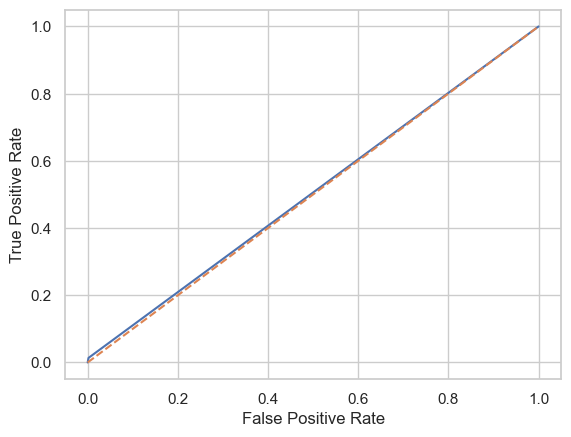

In [27]:
# ROC AUC score
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
print("The ROC AUC score is: ", roc_auc)

# roc curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate') # In this case, the flight was not delayed
plt.ylabel('True Positive Rate') # In this case, the flight was delayed

In [28]:
# Dealing with imbalanced data
# First we will check the class distribution
train['dep_delayed_15min'].value_counts()

dep_delayed_15min
0    80956
1    19044
Name: count, dtype: int64

In [31]:
from imblearn.over_sampling import SMOTE

# Option 1: Handle NA values before splitting
#train.dropna(inplace=True)
#X = train.drop('dep_delayed_15min', axis=1)
#y = train['dep_delayed_15min']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# We will train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# We will make predictions
y_pred = rf.predict(X_test)

# We will evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

# Or Option 2: Drop NA values simultaneously
#X = train.drop('dep_delayed_15min', axis=1)
#y = train['dep_delayed_15min']
#mask = X.notna().all(axis=1)
#X = X[mask]
#y = y[mask]

# Apply SMOTE
#smote = SMOTE(random_state=42)
#X_smote, y_smote = smote.fit_resample(X, y)

MemoryError: Unable to allocate 846. MiB for an array with shape (61934, 1790) and data type float64

In [ ]:
# Create a submission
test['DepTime'] = test['DepTime'].astype(str)
test['DepTime'] = pd.to_datetime(test['DepTime'], format='%H%M', errors='coerce')
test['hour'] = test['DepTime'].dt.hour
test['hour'] = np.where(test['hour'] > 12, test['hour'] - 12, test['hour'])
test['minute'] = test['DepTime'].dt.minute
test['Month'] = test['Month'].str.replace('c-', '')
test['DayofMonth'] = test['DayofMonth'].str.replace('c-', '')
test['DayOfWeek'] = test['DayOfWeek'].str.replace('c-', '')
test['Month'] = test['Month'].astype(int)
test['DayofMonth'] = test['DayofMonth'].astype(int)
test['DayOfWeek'] = test['DayOfWeek'].astype(int)
test['DepTime'] = test['DepTime'].dt.time
test['UniqueCarrier'] = le.transform(test['UniqueCarrier'])
test = pd.get_dummies(test, columns=['Origin', 'Dest'])
test = pd.get_dummies(test, columns=['DepTime'])
test.drop('ID', axis=1, inplace=True)

# We will make predictions
predictions = rf.predict(test)

# Create a submission file
sample = pd.read_csv('sample_submission.csv')
submission = pd.DataFrame({'ID': test.index, 'dep_delayed_15min': predictions})
submission.to_csv('submission.csv', index=False)